# *EDA Case Study*

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Importing the data
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')

*Let us first analyze the application_data dataframe*

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [4]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [5]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

In [6]:
application_data.shape

(307511, 122)

*We can observe that there are many columns in the data set but don't require all the columns for analysis. What we can do is select only a few columns based on our comprehension.*

In [7]:
application_data = application_data[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                     'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                     'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',]]

In [8]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Secondary / secondary special,Single / not married,House / apartment,-637,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Higher education,Married,House / apartment,-1188,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Secondary / secondary special,Single / not married,House / apartment,-225,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Secondary / secondary special,Civil marriage,House / apartment,-3039,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Secondary / secondary special,Single / not married,House / apartment,-3038,Core staff


In [9]:
application_data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
dtype: object

*Let us first observe the number of missing values in the dataset.*

In [12]:
application_data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
AMT_GOODS_PRICE          278
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_EMPLOYED              0
OCCUPATION_TYPE        96391
dtype: int64

In [13]:
100*application_data.isnull().sum()/application_data.shape[0]

SK_ID_CURR             0.00
TARGET                 0.00
NAME_CONTRACT_TYPE     0.00
CODE_GENDER            0.00
FLAG_OWN_CAR           0.00
FLAG_OWN_REALTY        0.00
CNT_CHILDREN           0.00
AMT_INCOME_TOTAL       0.00
AMT_CREDIT             0.00
AMT_ANNUITY            0.00
AMT_GOODS_PRICE        0.09
NAME_EDUCATION_TYPE    0.00
NAME_FAMILY_STATUS     0.00
NAME_HOUSING_TYPE      0.00
DAYS_EMPLOYED          0.00
OCCUPATION_TYPE       31.35
dtype: float64

*There are three columns with some missing values namely AMT_ANNUITY, AMT_GOODS_PRICE and OCCUPATION_TYPE. Let us analyze what could be the best metric to for imputing values.*

*Let us first consider the numerical column AMT_GOODS_PRICE using a boxplot.*

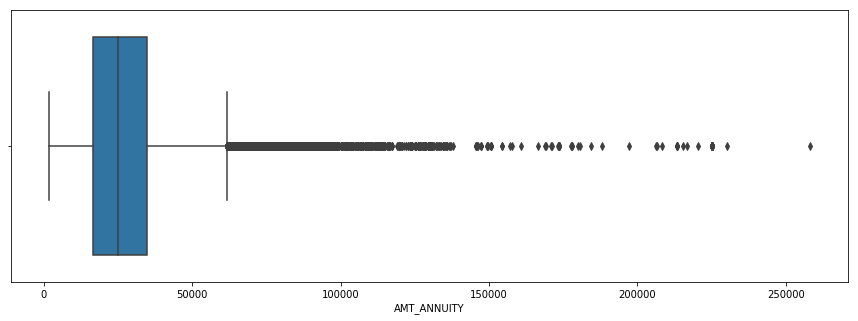

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(application_data['AMT_ANNUITY'])
plt.show()

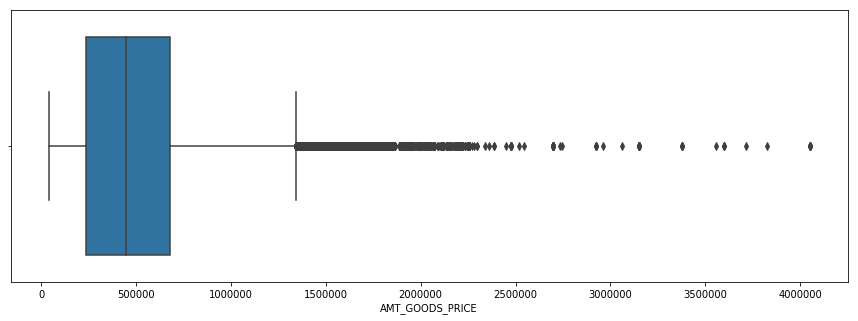

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()

*As we can observe that there are outliers present in these column. In such a scenario, the best way to impute the missing values is using the* ***MEDIAN*** *as it remains unaffected by the presence of outliers.*

*Let us now consider the categorical column OCCUPATION_TYPE*

In [16]:
application_data.groupby(['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].count().sort_values(ascending=False)

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

*As we can observe that the category Laborers has the maximum count in this column. Therefore, we can fill fill the missing values with the category Laborers. Laborers here is the* ***MODE*** *of this column.*

*Let us also check the datatypes to see if any datatype requires modification*

In [17]:
application_data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
dtype: object

In [18]:
application_data.nunique().sort_values(ascending=True)

TARGET                      2
NAME_CONTRACT_TYPE          2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CODE_GENDER                 3
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          6
NAME_HOUSING_TYPE           6
CNT_CHILDREN               15
OCCUPATION_TYPE            18
AMT_GOODS_PRICE          1002
AMT_INCOME_TOTAL         2548
AMT_CREDIT               5603
DAYS_EMPLOYED           12574
AMT_ANNUITY             13672
SK_ID_CURR             307511
dtype: int64

In [19]:
np.unique(application_data['TARGET'])

array([0, 1], dtype=int64)

*There are two columns that require datatype modification i.e. TARGET and SK_ID_CURR. TARGET variable contains only two distinct values i.e 0 and 1. Therefore it can be changed into an object. SK_ID_CURR are just the identification numbers. We cant' perform summation or other statistical analysis on this column.*

*Therefore, changing the datatype of these two columns as follows...*

In [20]:
application_data['TARGET'] = application_data['TARGET'].astype(object)

In [21]:
application_data['SK_ID_CURR'] = application_data['SK_ID_CURR'].astype(object)

*Let us now check outliers for numercial columns in the application_data dataframe. For convenience, let us define a new datafrmae containing only the numercial columns.*

In [22]:
numerical = application_data.select_dtypes(exclude='object')

In [23]:
numerical.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED
0,0,202500.00,406597.50,24700.50,351000.00,-637
1,0,270000.00,1293502.50,35698.50,1129500.00,-1188
2,0,67500.00,135000.00,6750.00,135000.00,-225
3,0,135000.00,312682.50,29686.50,297000.00,-3039
4,0,121500.00,513000.00,21865.50,513000.00,-3038


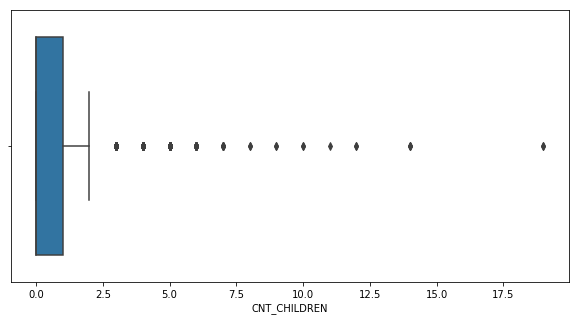

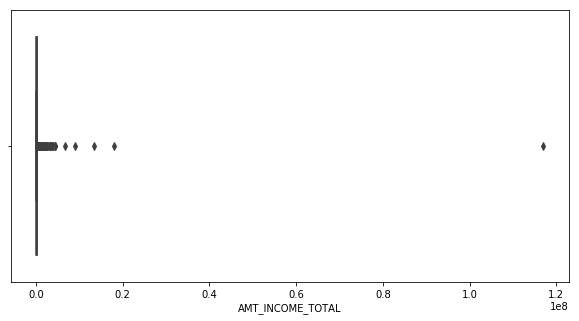

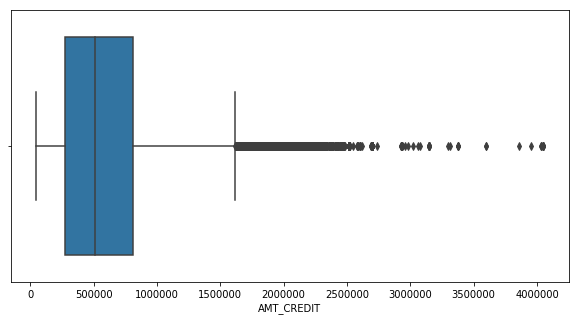

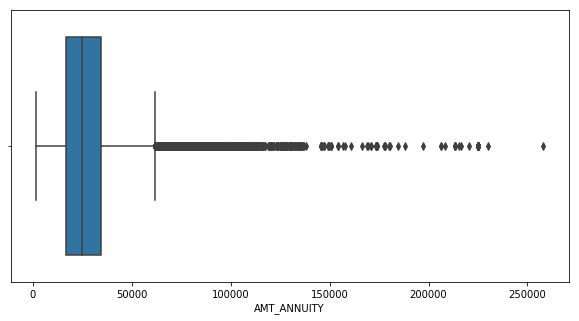

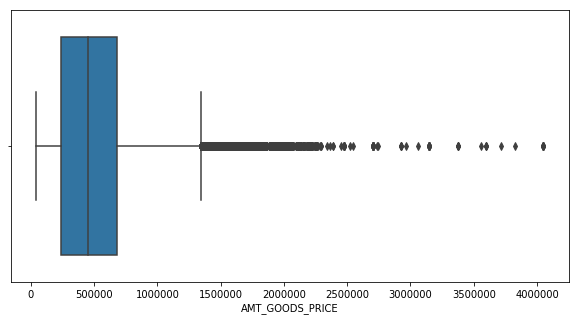

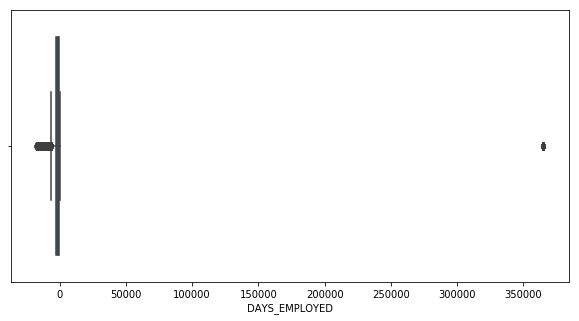

In [24]:
for i in numerical.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(numerical[i])
    plt.show()

*As we can observe that there are outliers present in all the numerical columns. Some of them are:*
>- ***CNT_CHILDREN***
>- ***AMT_CREDIT***
>- ***AMT_ANNUITY***

*Let us first analyze the CNT_CHILDREN as follows...*

In [25]:
print('The Quantile at 0 percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0))
print('The Quantile at 25th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0.25))
print('The Quantile at 50th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0.50))
print('The Quantile at 75th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0.75))
print('The Quantile at 90th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0.90))
print('The Quantile at 95th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0.95))
print('The Quantile at 99th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0.99))
print('The Quantile at 99.99th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 0.9999))
print('The Quantile at 100th percentile is: ',np.quantile(numerical['CNT_CHILDREN'], 1))

The Quantile at 0 percentile is:  0.0
The Quantile at 25th percentile is:  0.0
The Quantile at 50th percentile is:  0.0
The Quantile at 75th percentile is:  1.0
The Quantile at 90th percentile is:  2.0
The Quantile at 95th percentile is:  2.0
The Quantile at 99th percentile is:  3.0
The Quantile at 99.99th percentile is:  6.0
The Quantile at 100th percentile is:  19.0


In [26]:
numerical.groupby(['CNT_CHILDREN'])['CNT_CHILDREN'].count()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: CNT_CHILDREN, dtype: int64

*We can observe that the decrease is somewhat gradual upto 2 children. But there is an abrput decrease beyonnd 2 children. We can use capping to treat outliers in this case as follows.*

In [27]:
application_data['CNT_CHILDREN'] = application_data['CNT_CHILDREN'].apply(lambda x : 2 if x>2 else x)

*Let us analyze AMT_CREDIT*

In [28]:
print('The Quantile at 0 percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0))
print('The Quantile at 5 percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.05))
print('The Quantile at 10 percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.1))
print('The Quantile at 25th percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.25))
print('The Quantile at 50th percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.50))
print('The Quantile at 75th percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.75))
print('The Quantile at 90th percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.90))
print('The Quantile at 95th percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.95))
print('The Quantile at 99th percentile is: ',np.quantile(numerical['AMT_CREDIT'], 0.99))
print('The Quantile at 100th percentile is: ',np.quantile(numerical['AMT_CREDIT'], 1))

The Quantile at 0 percentile is:  45000.0
The Quantile at 5 percentile is:  135000.0
The Quantile at 10 percentile is:  180000.0
The Quantile at 25th percentile is:  270000.0
The Quantile at 50th percentile is:  513531.0
The Quantile at 75th percentile is:  808650.0
The Quantile at 90th percentile is:  1133748.0
The Quantile at 95th percentile is:  1350000.0
The Quantile at 99th percentile is:  1854000.0
The Quantile at 100th percentile is:  4050000.0


*Here is a gradual increase from 5th percentile up to 95th percentile. Beyond that, the changes are not gradual. This issue can be addresed by capping as well.*

In [29]:
application_data['AMT_CREDIT'] = application_data['AMT_CREDIT'].apply(lambda x : 1350000 if x>1350000 else x)

*Let us now consider the column AMT_ANNUITY*

In [30]:
application_data['AMT_ANNUITY'].head()

0   24700.50
1   35698.50
2    6750.00
3   29686.50
4   21865.50
Name: AMT_ANNUITY, dtype: float64

In [31]:
print('The Quantile at 0 percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0))
print('The Quantile at 5 percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.05))
print('The Quantile at 10 percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.1))
print('The Quantile at 25th percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.25))
print('The Quantile at 50th percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.50))
print('The Quantile at 75th percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.75))
print('The Quantile at 90th percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.90))
print('The Quantile at 95th percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.95))
print('The Quantile at 99th percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 0.99))
print('The Quantile at 100th percentile is: ',np.quantile(numerical['AMT_ANNUITY'], 1))

The Quantile at 0 percentile is:  nan
The Quantile at 5 percentile is:  nan
The Quantile at 10 percentile is:  nan
The Quantile at 25th percentile is:  nan
The Quantile at 50th percentile is:  nan
The Quantile at 75th percentile is:  nan
The Quantile at 90th percentile is:  nan
The Quantile at 95th percentile is:  nan
The Quantile at 99th percentile is:  nan
The Quantile at 100th percentile is:  nan


*As we can see that the percetiles throws up nan. This is an indication that there is an error in this column. Let us first analyze this column and fix this issue before treating outliers.*

In [32]:
application_data['AMT_ANNUITY'].isnull().sum()

12

*Here also we have some missing values and because of that, we are not able to find the percentiles. Let us first impute the missing values buy using the median method as discussed before.*

In [33]:
application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median(), inplace=True)

In [34]:
print(np.quantile(application_data['AMT_ANNUITY'],0))
print(np.quantile(application_data['AMT_ANNUITY'],0.05))
print(np.quantile(application_data['AMT_ANNUITY'],0.1))
print(np.quantile(application_data['AMT_ANNUITY'],0.25))
print(np.quantile(application_data['AMT_ANNUITY'],0.50))
print(np.quantile(application_data['AMT_ANNUITY'],0.75))
print(np.quantile(application_data['AMT_ANNUITY'],0.9))
print(np.quantile(application_data['AMT_ANNUITY'],0.91))
print(np.quantile(application_data['AMT_ANNUITY'],0.92))
print(np.quantile(application_data['AMT_ANNUITY'],0.93))
print(np.quantile(application_data['AMT_ANNUITY'],0.94))
print(np.quantile(application_data['AMT_ANNUITY'],0.95))
print(np.quantile(application_data['AMT_ANNUITY'],0.96))
print(np.quantile(application_data['AMT_ANNUITY'],0.97))
print(np.quantile(application_data['AMT_ANNUITY'],0.98))
print(np.quantile(application_data['AMT_ANNUITY'],0.99))
print(np.quantile(application_data['AMT_ANNUITY'],1))

1615.5
9000.0
11074.5
16524.0
24903.0
34596.0
45954.0
47254.5
48465.0
49878.0
51745.5
53325.0
55624.5
58480.65000000005
62964.0
70006.5
258025.5


*Again we can observe that there is a gradual increase from 5th percentile up to 98th percentile. Again we can use capping as follows.*

In [35]:
application_data['AMT_ANNUITY'] = application_data['AMT_ANNUITY'].apply(lambda x : 62964 if x>62964 else x)

*We have treated the outliers for these columns but let us also visualize them.*

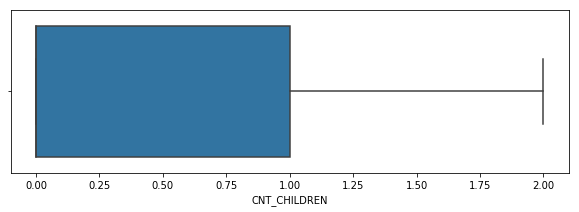

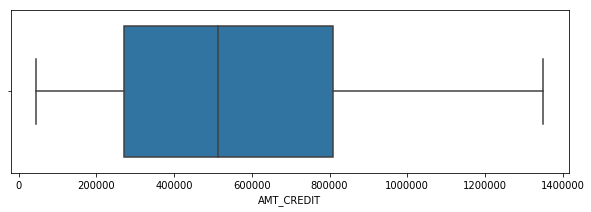

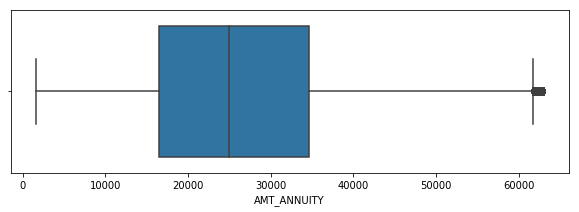

In [36]:
l = ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY']
for i in l:
    plt.figure(figsize=(10,3))
    sns.boxplot(application_data[i])
    plt.show()

*As we can see that the outliers have been removed to a great extent.*

*Let us also check if there are any numerical columns that we can bin to extract a categorcial column out of it.*

In [37]:
numerical.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED
0,0,202500.00,406597.50,24700.50,351000.00,-637
1,0,270000.00,1293502.50,35698.50,1129500.00,-1188
2,0,67500.00,135000.00,6750.00,135000.00,-225
3,0,135000.00,312682.50,29686.50,297000.00,-3039
4,0,121500.00,513000.00,21865.50,513000.00,-3038


*AMT_INCOME_TOTAL can be binned into categories.*

*Let us first analyze it for AMT_INCOME_TOTAL as follows...*

In [38]:
print(np.quantile(application_data['AMT_INCOME_TOTAL'], 0))
print(np.quantile(application_data['AMT_INCOME_TOTAL'], 0.2))

25650.0
99000.0


*This can be categorized as a low income category.*

In [39]:
print(np.quantile(application_data['AMT_INCOME_TOTAL'], 0.21))
print(np.quantile(application_data['AMT_INCOME_TOTAL'], 0.92))

103500.0
292500.0


*This can be categorized as a medium income category.*

In [40]:
print(np.quantile(application_data['AMT_INCOME_TOTAL'], 0.93))
print(np.quantile(application_data['AMT_INCOME_TOTAL'], 1))

315000.0
117000000.0


*This can be categorized as a high income category.*

*Let us define a function for binning of AMT_INCOME_TOTAL column as low, medium, high as follows...*

In [41]:
def inc_category(x):
    if x >= 315000.0:
        return 'HIGH'
    elif x >= 103500.0:
        return 'MEDIUM'
    else:
        return 'LOW'

*Let us define a new column now in the application_data as follows...*

In [42]:
application_data['INCOME_CATEGORY'] = application_data['AMT_INCOME_TOTAL'].apply(inc_category)

*By means of a countplot let us analyze the applicants applying for loans mostly fall into which category.*

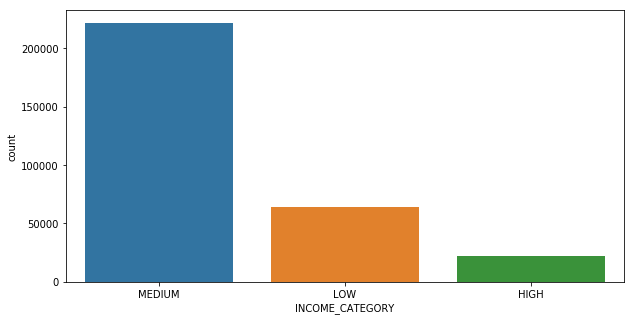

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(application_data['INCOME_CATEGORY'])
plt.show()

*We can observe that the MEDIUM income category majorly appliies for the loans where are HIGH income category don't apply for loans in a significant manner.*

*Let us now segment our dataset into two dataframes i.e one for TARGET 0 and one for TARGET 1.*

In [44]:
target_0 = application_data[application_data['TARGET'] == 0]
target_1 = application_data[application_data['TARGET'] == 1]

*Let us check the data imbalance with respect to TARGET variable.*

In [45]:
round(100*target_0.shape[0]/application_data.shape[0], 2)

91.93

*The Percentage of Data present for TARGET 0 is a humongous 91.93.*

In [46]:
round(100*target_1.shape[0]/application_data.shape[0], 2)

8.07

*The Percentage of Data present for TARGET 1 is a mere 8.07.*

***There is a huge DATA IMBALANCE***

*Let us also visualize the data imbalance by means of a countplot.*

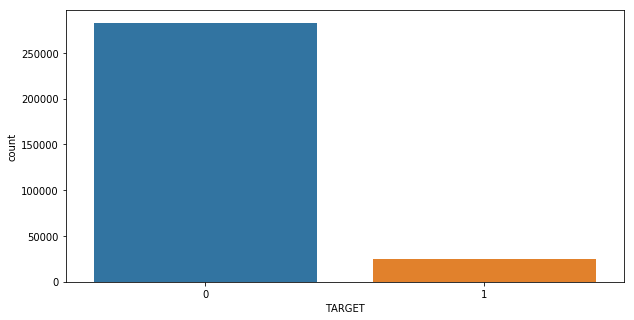

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(application_data['TARGET'])
plt.show()

*Let us now try to perform univariate analysis.*<br>
*Let us divide our dataframes further into categorical and numercial columns.*

In [48]:
numerical_0 = target_0.select_dtypes(exclude='object')
categorical_0 = target_0.select_dtypes(include='object')

numerical_1 = target_1.select_dtypes(exclude='object')
categorical_1 = target_1.select_dtypes(include='object')

*Let us first perform some univariate analysis with categorical variables.*

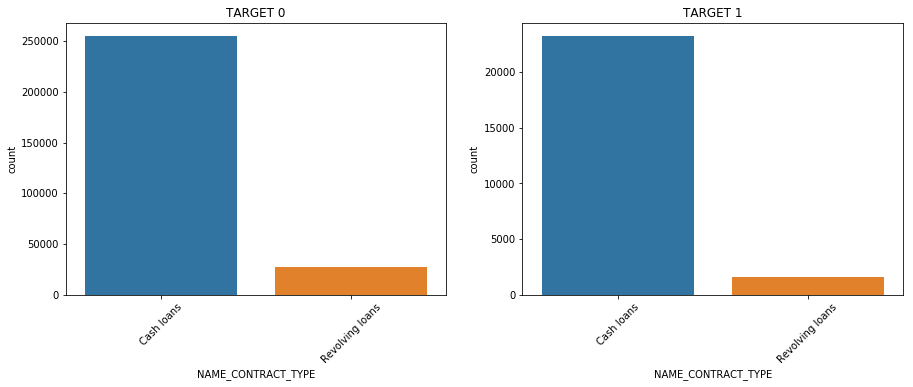

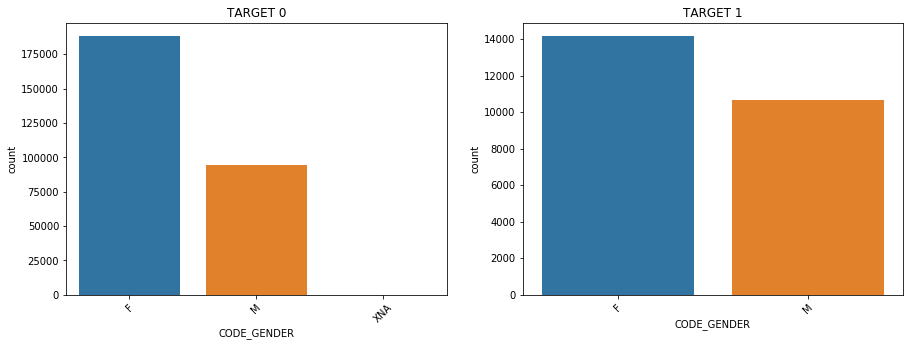

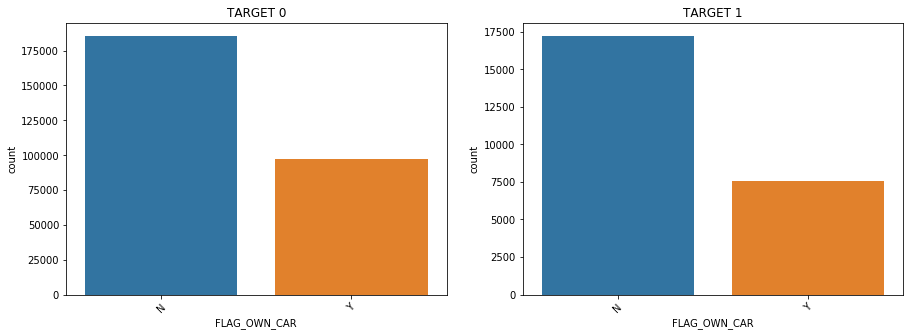

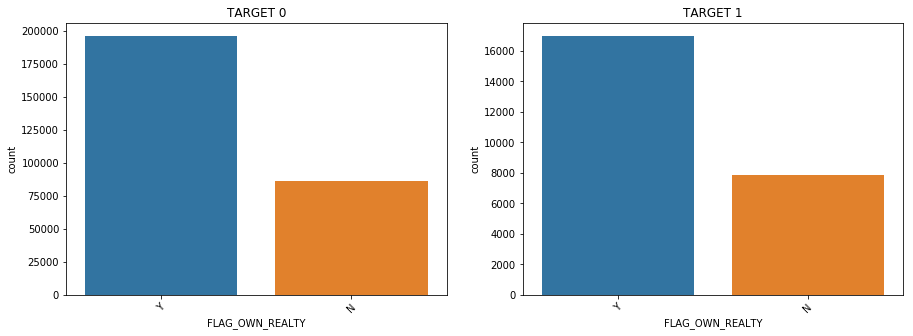

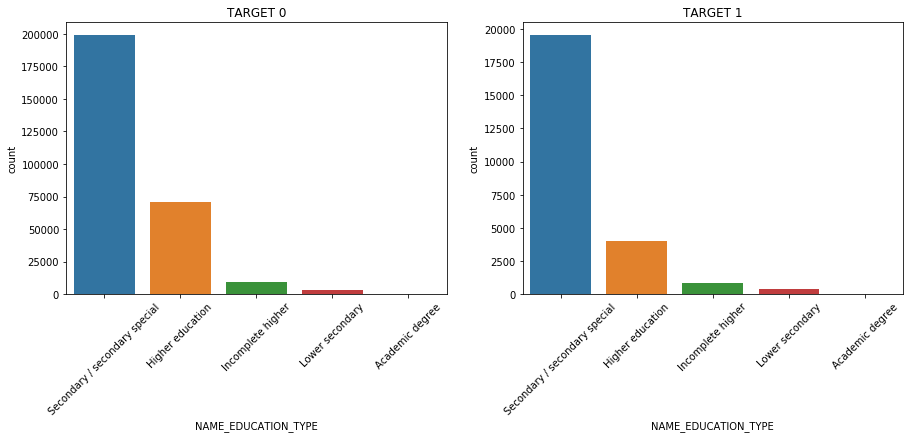

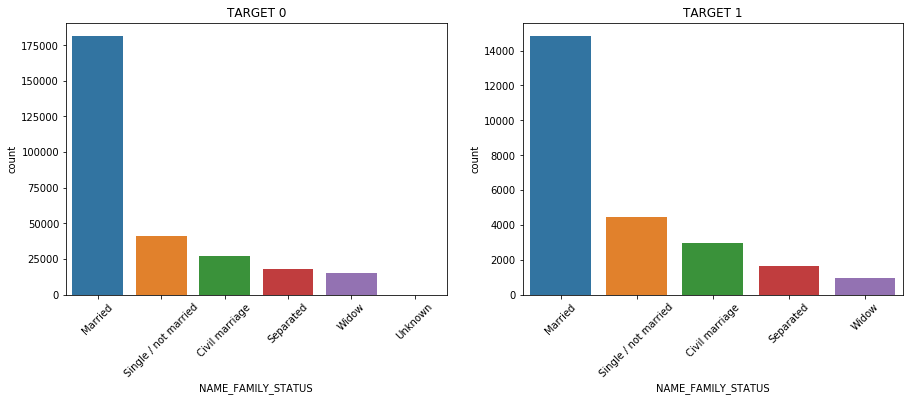

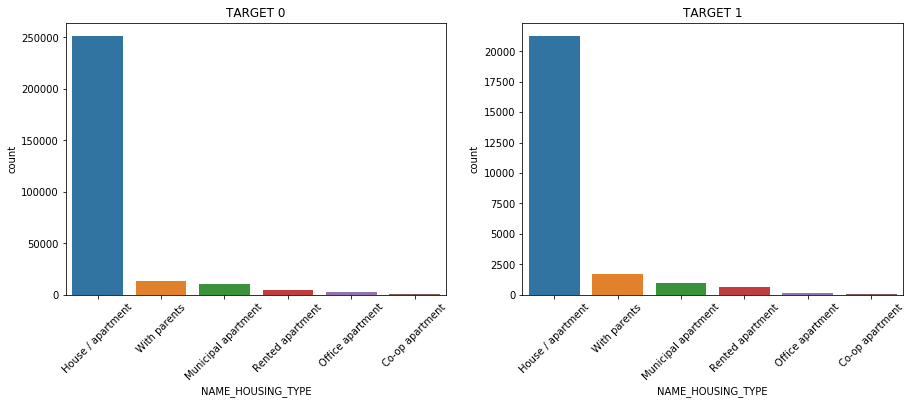

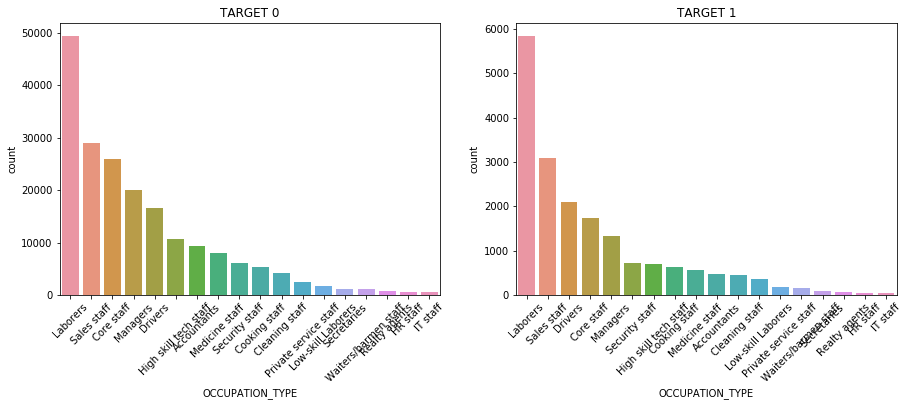

In [49]:
for i in categorical_0.columns[2:-1]:
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title('TARGET 0')
    sns.countplot(categorical_0[i], order=categorical_0[i].value_counts().index)
    plt.xticks(rotation=45)
    plt.subplot(122)
    plt.title('TARGET 1')
    sns.countplot(categorical_1[i], order=categorical_1[i].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

#### *NAME_CONTRACT_TYPE*
> *The behavior of this column with respect to both the Target cases is similar. Cash loans dominates follwed by miniscule count of Resolving loans. Therefore, concentrating on Target 1 we can conclude, that applicants with payment difficulties tend to apply mostly for Cash lons instead of Revolving loans. Therefore, the company may exercise caution before granting Cash loans as such applicants might default.*

#### *CODE_GENDER*
> *In this column also we can observe that the behaviour is quite similar with Females having the maximum count followed by Males at second. There is a category XNA that has a very low count. This probably means that they didn't disclose their gender. Concentrating on Target 1, we can extract that Females usually have payment difficulties as compared to Men. Therefore, the company may take this into consideration before granting the loan.* 

#### *FLAG_OWN_CAR*
> *As we can see that again that the behaviour is similar in both cases. Category 'N' (no) has the maximum count followed by 'Y' (yes). Concentrating on Target 1 we can conclude that the company may exercise caution before granting loans to people who don't own a car as compared to those who own a car.*

#### *FLAG_OWN_REALTY*
> *Yet again, behavior of column is similar i both the Target cases. Category 'Y' has the maximum count followed by category 'N'. This means the number of people who own a house apply for the loans more number of times as compared to those people who don't. Concentrating on Target 1 we can conclude that the company may exercise caution before granting loans to people who own a house as compared to those who don't as such applicants might default. On a side note, we can understand one point from FLAG_OWN_CAR column and this column that people either like to own either a house or a car but not both at the same time.*

#### *NAME_EDUCATION_TYPE*
> *Trend again is similar in both the Target cases. Secondary/secondary special has the highest count followed by other four categories. Concentrating on Target 1, we can notice that applicants who are not  much qualified i.e. applicants belonging to the categories Secondary/secondary special, Higher education, Incomplete higher and Lower secondary mostly apply for loans and the applicants belonging to the category Academic degree hardly apply for loans. Therefore, it may be beneficial for the company to exercise caution before granting loans to applicants who are less qualified.*

#### *NAME_FAMILY_STATUS*
> *Trend is similar in both the target cases. Category Married has the highest count with a considerable lead followed by other categories. Concentrating on Target 1, we can conclude that the company may need to scrutinze married applicants before granting them loans.*

#### *NAME_HOUSING_TYPE*
> *Yet again the trend is similar in both the Target cases with applicants who have a house/apartmemt leading by a significant distance. Concentrating on Target 1 we can conclude that the company may need to exercise caution before granting loans to applicants who own a house/apartment. This column has just confirmed the conclusion that we derived from the column FLAG_OWN_REALTY.*

#### *OCCUPATION_TYPE*
> *Some differences can be observed in the behaviour of the column in both Target cases. But Laborer has the highest count and leads by a distance in both the cases. Analysing the different categories of the occupation, we can observe that people belonging to the low income strata (like laborers, drivers, low-skill laborers etc.) mostly apply for the loans while the people who have decent enough jobs (like high skill tech staff, managers) don't apply for loans that much. Therefore, we can conclude that the company may need to exercise caution before granting loans to applicants who don't have financially decent enough jobs.*

*Let us now analyze the numerical columns. Let us first compute the correlations.*

In [50]:
corr_mat_0 = numerical_0.corr()
corr_mat_1 = numerical_1.corr()

*Let us first plot the heatmap to analyze the correlation*

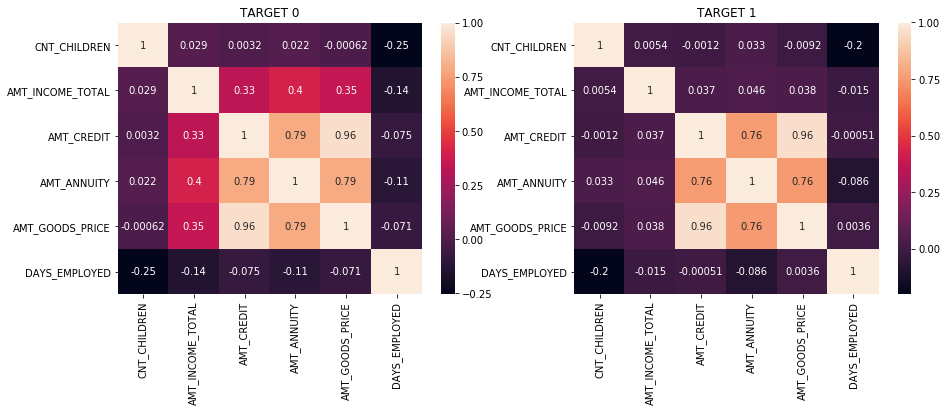

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('TARGET 0')
sns.heatmap(corr_mat_0, annot=True)
plt.subplot(122)
plt.title('TARGET 1')
sns.heatmap(corr_mat_1, annot=True)
plt.show()

*We can clearly observe that the correlation of AMT_INCOME_TOTAL with other columns in Target 0 is significantly different as compared to Target 1. Rest of the columns have somewhat similar behavior but with difference in absolute values of correlation.*

In [52]:
corr_0 = corr_mat_0.where(np.triu(np.ones(corr_mat_0.shape),k=1).astype(np.bool))
corr_1 = corr_mat_1.where(np.triu(np.ones(corr_mat_1.shape),k=1).astype(np.bool))

In [53]:
corr_0 = corr_0.abs().unstack().reset_index()
corr_1 = corr_1.abs().unstack().reset_index()

In [54]:
corr_0.columns = ['VARIABLE 1', 'VARIABLE 2', 'CORRELATION']
corr_1.columns = ['VARIABLE 1', 'VARIABLE 2', 'CORRELATION']

In [55]:
corr_0.sort_values('CORRELATION', ascending=False)[:10]

,VARIABLE 1,VARIABLE 2,CORRELATION
26,AMT_GOODS_PRICE,AMT_CREDIT,0.96
20,AMT_ANNUITY,AMT_CREDIT,0.79
27,AMT_GOODS_PRICE,AMT_ANNUITY,0.79
19,AMT_ANNUITY,AMT_INCOME_TOTAL,0.40
25,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
13,AMT_CREDIT,AMT_INCOME_TOTAL,0.33
30,DAYS_EMPLOYED,CNT_CHILDREN,0.25
31,DAYS_EMPLOYED,AMT_INCOME_TOTAL,0.14
33,DAYS_EMPLOYED,AMT_ANNUITY,0.11
32,DAYS_EMPLOYED,AMT_CREDIT,0.07


In [56]:
corr_1.sort_values('CORRELATION', ascending=False)[:10]

,VARIABLE 1,VARIABLE 2,CORRELATION
26,AMT_GOODS_PRICE,AMT_CREDIT,0.96
20,AMT_ANNUITY,AMT_CREDIT,0.76
27,AMT_GOODS_PRICE,AMT_ANNUITY,0.76
30,DAYS_EMPLOYED,CNT_CHILDREN,0.20
33,DAYS_EMPLOYED,AMT_ANNUITY,0.09
19,AMT_ANNUITY,AMT_INCOME_TOTAL,0.05
25,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.04
13,AMT_CREDIT,AMT_INCOME_TOTAL,0.04
18,AMT_ANNUITY,CNT_CHILDREN,0.03
31,DAYS_EMPLOYED,AMT_INCOME_TOTAL,0.01


*As we can observe that the top 3 correlations in both the Target cases i.e. AMT_GOODS_PRICE vs AMT_CREDIT, AMT_ANNUITY vs AMT_CREDIT, AMT_GOODS_PRICE vs AMT_ANNUITY are same with minor differences in absolute values. But beyond the top 3, there are differences in the correlation values of the very same columns in both Target cases. Additionally, in the case of Target 0, there is a gradual decrease in the correlation values but in Target 1, the decrease is sharper.*

*Let us also plot some of these variables to visualize these correlations.*

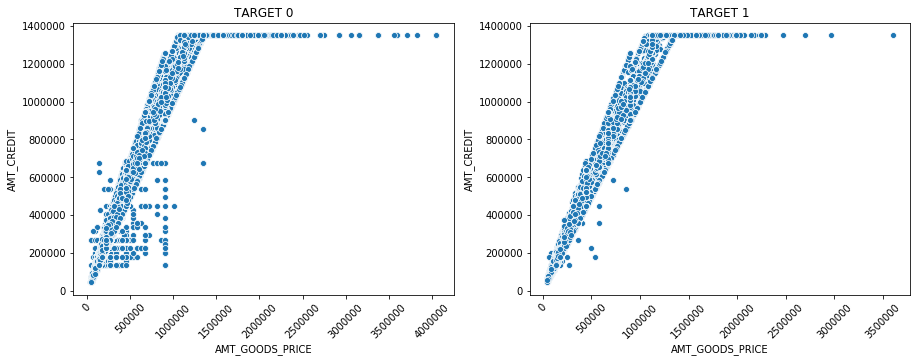

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=numerical_0)
plt.xticks(rotation=45)
plt.title('TARGET 0')
plt.subplot(122)
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=numerical_1)
plt.xticks(rotation=45)
plt.title('TARGET 1')
plt.show()

*We already know that the correlation between AMT_GOODS_PRICE and AMT_CREDIT is similar except for minor differences. This is confirmed by the scatterplot as well. This means that as the price of goods increases, the credit amount also increases. Also, since these columns are highly correlated, therefore, one of the columns can be dropped and one retained and that won't have any impact on the data available.*

*Let us now try to visualize one of those columns that have different correlation with respect to both the Target cases.*

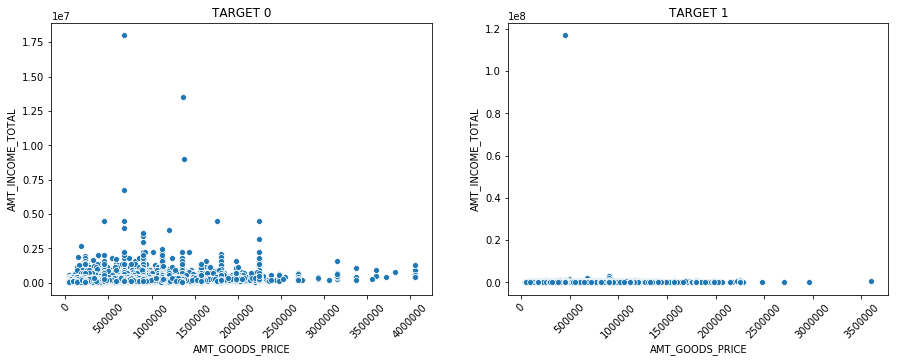

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(y='AMT_INCOME_TOTAL', x='AMT_GOODS_PRICE', data=numerical_0)
plt.xticks(rotation=45)
plt.title('TARGET 0')
plt.subplot(122)
sns.scatterplot(y='AMT_INCOME_TOTAL', x='AMT_GOODS_PRICE', data=numerical_1)
plt.xticks(rotation=45)
plt.title('TARGET 1')
plt.show()

*We can confirm that the correlation we calculated between AMT_GOODS_PRICE and AMT_INCOME_TOTAL is different in both the Target cases by means of this scatterplot. There is some positive correlation in the case of Target 0 (0.35) while there is virtually no correlation (0.04) in the case of Target 1. A contrasting behavior. We can observe that Target 0 corresponds to people with no payment difficulties and hence may have relatively higher income whereas Target 1 corresponds to people with payment difficulties and may have relatively lower income. In the case of Target 0, we can conclude that people who have high income can take the risk to purchase expensive goods which explains the higher positive correlation. In the case of Target 0, despite having low income (in most cases), even then people take the risk to purchase expensive goods. Given this, the company may need to exercise caution before granting loans to applicants with low income and especially those that purchase expensive goods despite having low income.*

*Let us also analyze the Target variable in the application_data dataframe with respect to some numerical columns.*

In [59]:
numerical.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_EMPLOYED'],
      dtype='object')

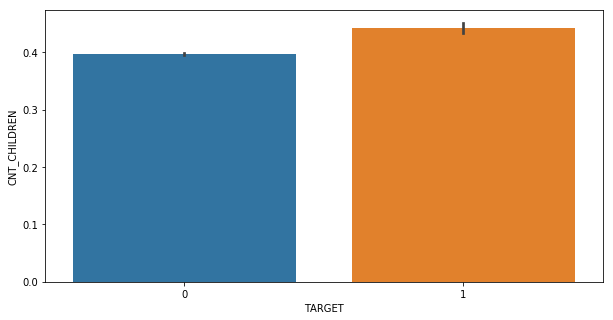

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=application_data['TARGET'], y=application_data['CNT_CHILDREN'])
plt.show()

*People with payment difficulties i.e. Target 1 have more number of children on an average as compared to Target 0. The company can the exercise caution before granting loans to those people with more number of children.*

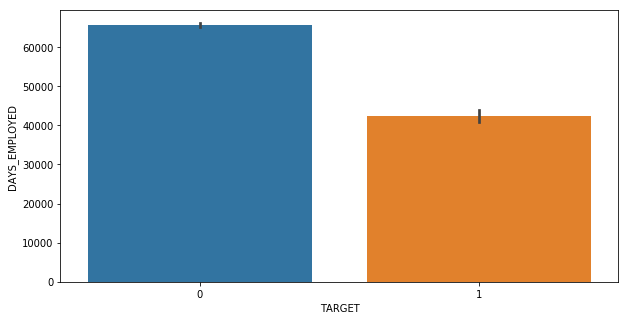

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x=application_data['TARGET'], y=application_data['DAYS_EMPLOYED'])
plt.show()

*On an average, the number of employment days in the case of Target 1 is quite less as compared to Target 0. This may mean that Target 1 has applicants who are relatively new in their respective jobs or maybe complete fresher in their jobs. Therefore, the company can exercise caution before granting loans to applicants who are fresher in their respective jobs or people who had a recent job shift.*

*Let us now analyze the previous_application dataframe.*

In [62]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [63]:
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

*The columns SK_ID_CURR and SK_ID_PREV are indeed categories but are represented as numericals. So changing their datatypes as follows.*

In [64]:
previous_application['SK_ID_CURR'] = previous_application['SK_ID_CURR'].astype(object)
previous_application['SK_ID_PREV'] = previous_application['SK_ID_PREV'].astype(object)

In [65]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [66]:
100*previous_application.isnull().sum()/previous_application.shape[0]

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

*As we can see that there are some columns that have a very high percentage of missing values. It is better to drop some of those columns.*

In [67]:
previous_application.drop(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
                           'NAME_TYPE_SUITE'], axis=1, inplace=True)

In [68]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


*Let us first visualize as to how many of the total applications received are Approved, and Refused.*

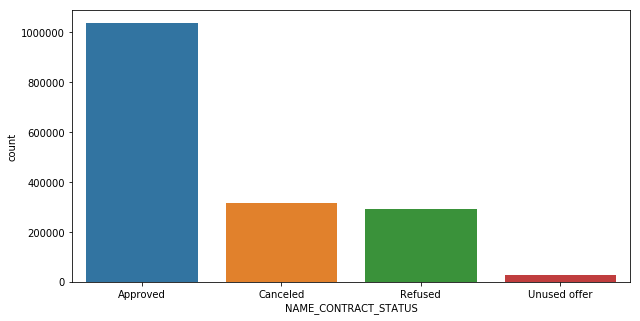

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(previous_application['NAME_CONTRACT_STATUS'],order=previous_application['NAME_CONTRACT_STATUS'].value_counts().index)
plt.show()

*As we can observe that majority of the applications received get an Approval status by the company. Compared to this, not many applications get Rejected. Some are Canceled by the applicants themselves while a low number of applications are unused offers. Data is heavily imbalanced in favour of Approvals. This may indicate that the company lacks a reliable mechanism to identify potential loan defaulters and hence approve loans of a large number of applicants. Therefore, a better system needs to be put in place.*

*Let us merge the dataframes as follows.*

In [70]:
combdf = pd.merge(left=previous_application, right=application_data[['SK_ID_CURR','TARGET']], on='SK_ID_CURR', how='outer')

In [71]:
combdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877.00,Consumer loans,1730.43,17145.00,17145.00,17145.00,SATURDAY,15.00,Y,1.00,XAP,Approved,-73.00,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.00,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00,0
1,1696966,271877.00,Consumer loans,68258.65,1800000.00,1754721.00,1800000.00,SATURDAY,18.00,Y,1.00,XAP,Refused,-472.00,Cash through the bank,SCO,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55.00,Furniture,36.00,low_normal,POS industry with interest,nan,nan,nan,nan,nan,nan,0
2,2154916,271877.00,Consumer loans,12417.39,108400.50,119848.50,108400.50,SUNDAY,14.00,Y,1.00,XAP,Approved,-548.00,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,196.00,Furniture,12.00,middle,POS industry with interest,365243.00,-512.00,-182.00,-392.00,-387.00,0.00,0
3,2802425,108129.00,Cash loans,25188.62,607500.00,679671.00,607500.00,THURSDAY,11.00,Y,1.00,XNA,Approved,-164.00,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.00,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00,0
4,1536272,108129.00,Cash loans,21709.12,450000.00,512370.00,450000.00,WEDNESDAY,9.00,Y,1.00,XNA,Approved,-515.00,XNA,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.00,XNA,36.00,low_normal,Cash X-Sell: low,365243.00,-485.00,565.00,-155.00,-147.00,1.00,0


In [72]:
combdf.shape

(1686668, 33)

*Let us select only those columns that we find useful based on our own understanding.*

In [73]:
new_combdf = combdf[['SK_ID_PREV', 'SK_ID_CURR','NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS',
                     'NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'TARGET']]

In [74]:
new_combdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,TARGET
0,2030495,271877.00,Consumer loans,1730.43,17145.00,Approved,Cash through the bank,Repeater,Mobile,0
1,1696966,271877.00,Consumer loans,68258.65,1800000.00,Refused,Cash through the bank,Repeater,Clothing and Accessories,0
2,2154916,271877.00,Consumer loans,12417.39,108400.50,Approved,Cash through the bank,New,Furniture,0
3,2802425,108129.00,Cash loans,25188.62,607500.00,Approved,XNA,Repeater,XNA,0
4,1536272,108129.00,Cash loans,21709.12,450000.00,Approved,XNA,Repeater,XNA,0


*Let us segment this dataframe into Target 0 and Target 1.*

In [75]:
prev_target_0 = new_combdf[new_combdf['TARGET']==0]
prev_target_1 = new_combdf[new_combdf['TARGET']==1]

*Let us further divide the dataframes into numerical and categorical.*

In [76]:
prev_numerical_0 = prev_target_0.select_dtypes(exclude='object')
prev_categorical_0 = prev_target_0.select_dtypes(include='object')

prev_numerical_1 = prev_target_1.select_dtypes(exclude='object')
prev_categorical_1 = prev_target_1.select_dtypes(include='object')

*Let us analyze the categorical columns first.*

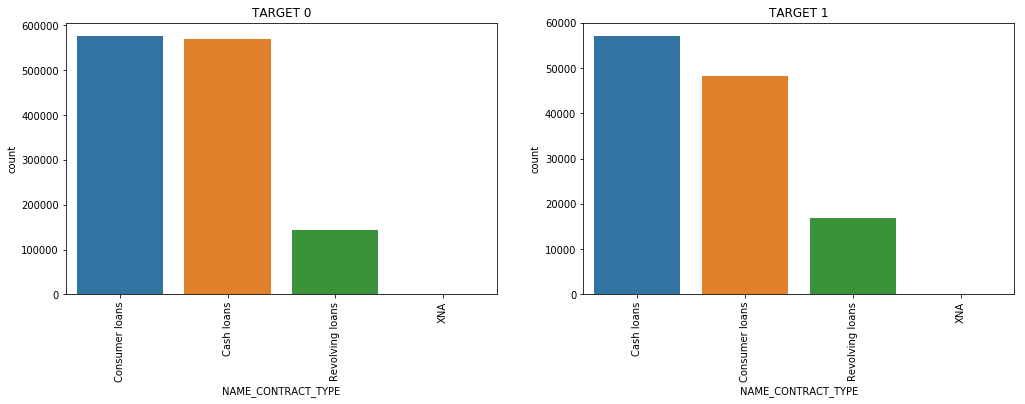

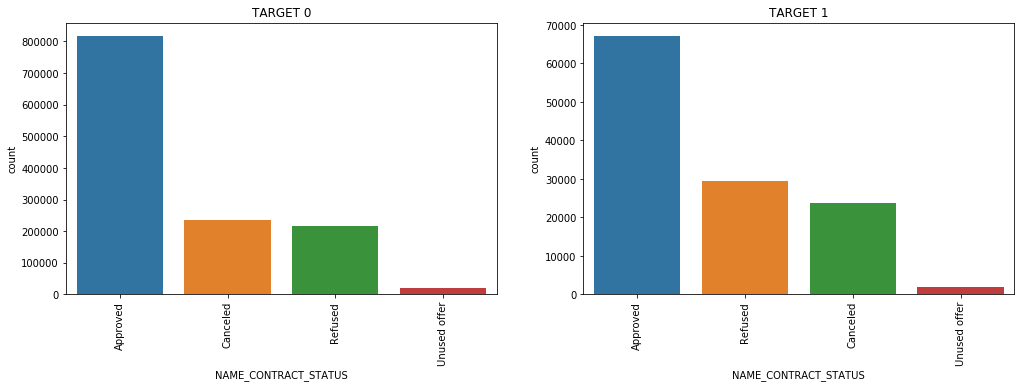

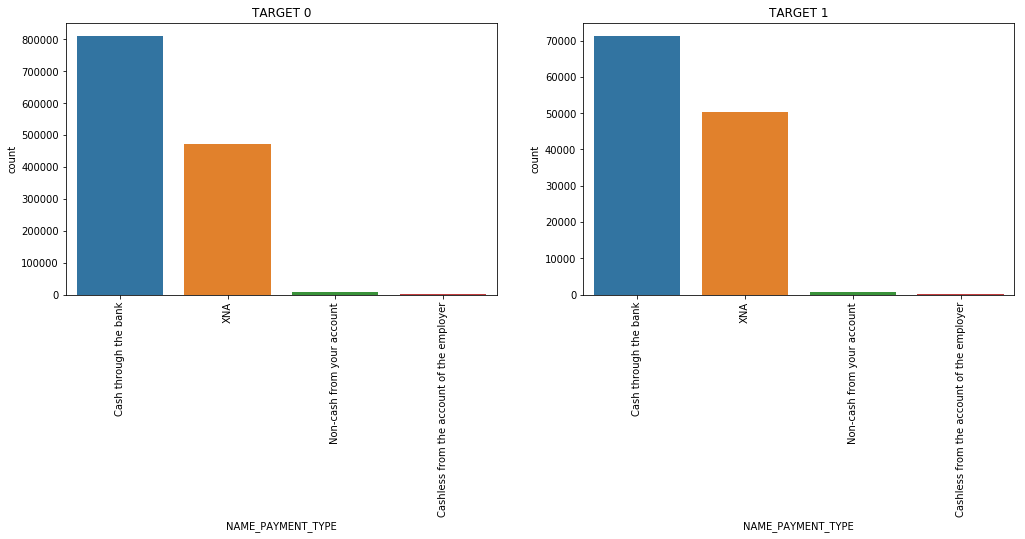

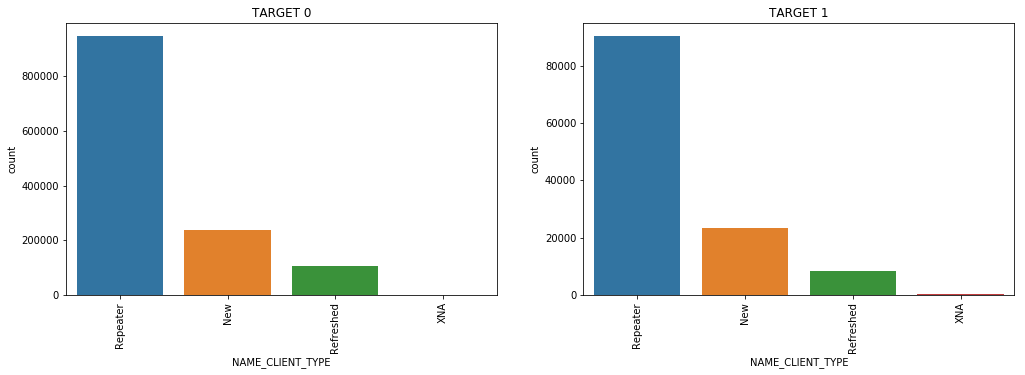

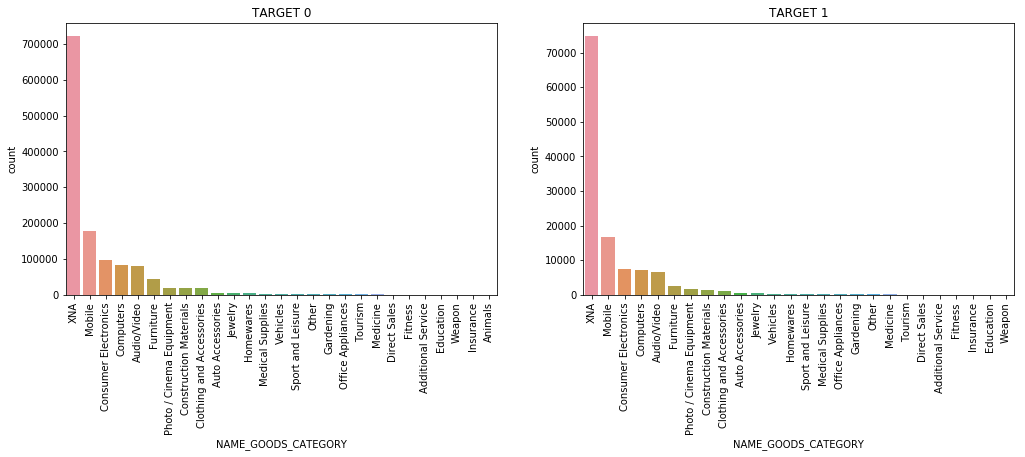

In [77]:
for i in prev_categorical_0.columns[1:-1]:
    plt.figure(figsize=(17,5))
    plt.subplot(121)
    sns.countplot(prev_categorical_0[i], order=prev_categorical_0[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('TARGET 0')
    plt.subplot(122)
    sns.countplot(prev_categorical_1[i], order=prev_categorical_1[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('TARGET 1')
    plt.show()

#### *NAME_CONTRACT_TYPE*
> *In the case of Target 0, we see that Consumer loans has the maximum count followed by Cash loans. Although the difference in the count is not significant. However, in the case of Target 1, we see that Cash loans has the maximum frequency followed by Consumer loans. Therefore, it can be concluded that applicants with payment issues are more likely to apply for Cash loans and hence the company needs to exercise caution before granting such loan applications.*

#### *NAME_CONTRACT_STATUS*
> *In both the Target cases, we can observe that the category Approved has the maximum numer of counts. Approved having the maximum numer of counts in the case of Target 0 is understandable but in the case of Target 1, it should have been a lot lesser. This may indicate that the company lacks a relaible mechanism to identify potential loan defaulters and therefore need to put a decent mechanism in place.*

#### *NAME_PAYMENT_TYPE*
> *We can observe identical trends in both the Target cases with the category Cash through the bank having the maximum count. Considering Target 1, we see here also that Cash through the bank is the most frequently used type of payment. Therefore, the company needs to be judicious before granting loans to applicants using Cash through the bank as their mode of payment. We also notice that the second most frequent category is the 'XNA'. Its usual meaning is 'Not Applicable'. In this context, it may mean that the company failed to record their payment type. This can lead to erros and inconsistency in data and hence the company needs to avoid such errors.*

#### *NAME_CLIENT_TYPE*
> *Again, identical trends can be observed in both the Target cases with the category Repeater having the highest count. Considering Target 1, we can conclude that the company needs to exercise caution before granting loans to repeater applicants.*

#### *NAME_GOODS_CATEGORY*
> *The trends in both the Target cases is mostly similar except a few exceptions but those exceptions are not significant enough. However, the trends are identical for first 11 categories (till Jewelry). In both the cases, category 'XNA' has the maximum number of count. All the other categories are quite low on count. 'XNA' usually means 'Not Applicable' which may indicate that people usually don't disclose the goods for which they are applied for loans. This is common to both the Target cases. Therefore, the company needs to exercise caution before granting loans to such people as there is a significant possibiliy that they may default.*

*Let us now analyze the correlation between numerical columns*

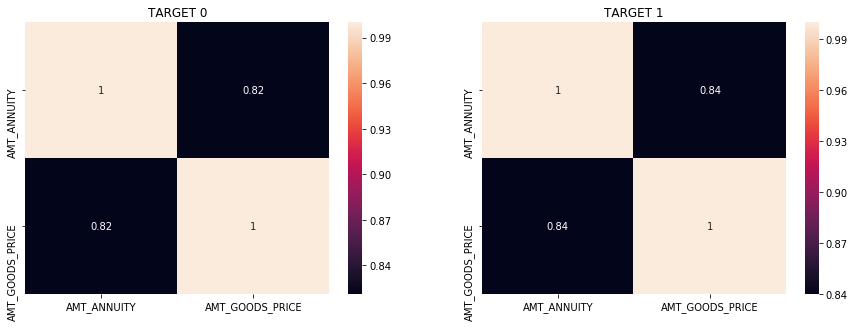

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('TARGET 0')
sns.heatmap(prev_numerical_0.iloc[:, 1:].corr(), annot=True)
plt.subplot(122)
plt.title('TARGET 1')
sns.heatmap(prev_numerical_1.iloc[:, 1:].corr(), annot=True)
plt.show()

*AMT_GOODS_PRICE shares a high correlation with AMT_ANNUITY in both the target cases. The values are similar as well i.e. 0.82 in Target 0 and 0.84 in Target 1.*

*Let us also try to visualize this correlation by means of a scatterplot.*

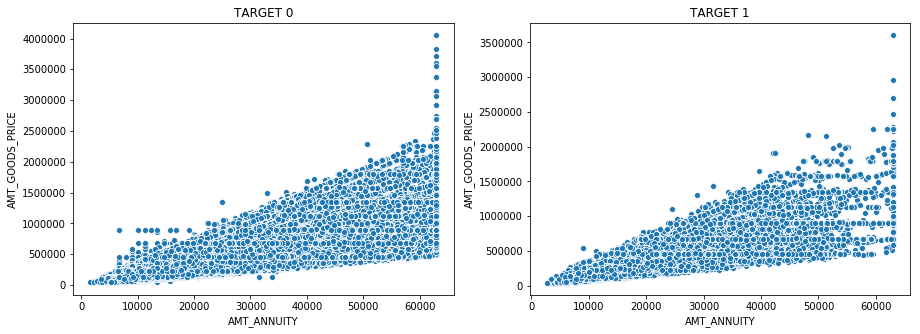

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x=numerical_0['AMT_ANNUITY'], y=numerical_0['AMT_GOODS_PRICE'])
plt.title('TARGET 0')
plt.subplot(122)
sns.scatterplot(x=numerical_1['AMT_ANNUITY'], y=numerical_1['AMT_GOODS_PRICE'])
plt.title('TARGET 1')
plt.show()

*High positive correlation can also be confirmed by means of this scatterplot as well. The trends, as observed before in heatmap, is similar in both the Target cases. Naturally, as the amount of good's price increase, it will bring a proportional amount of money to the client and that's why we see such a positive correlation between the 2 variables for both the cases and rightly so. Considering Target 1, if for any applicant, such trends are observed between these two columns, then the company can exercise caution before granting loans as such applicants might default.*

## *RECOMMENDATIONS*
>- *Company needs to address the issue of Data Imbalance to pave the way for an unbiased analysis.*
>- *Company may need to exercise caution before granting Cash loans as such applicants have payment issues and hence may default.*
>- *Company may need to exercise caution before granting loans to applicants who don't own a car as they may default.*
>- *Company may need to exercise caution before granting loans to applicants who own a house as they may default.*
>- *Company may need to exercise caution before granting loans to applicants who are less qualified as they may default.*
>- *Company may need to exercise caution before granting loans to applicants who are married as they may default.*
>- *Company may need to exercise caution before granting loans to applicants who don't have financially decent enough jobs as they may default.*
>- *Company may need to exercise caution before granting loans to applicants with low income but still purchasing expensive goods as they may default.*
>- *Applicants with payment difficulties on an average have more children and hence may default. Therefore, the company may exercise caution.*
>- *On an average, people with payment difficulties have less number of employment days. Therefore, company may exercise caution before granting loans to applicants who are fresher in their respective jobs or had a recent job shift.*
>- *Maximum number of applications are approved by the company even in the case of people with payment difficulties. It may indicate that the company lacks a reliable mechanism to identify potential defaulters.*
>- *Applicants with Cash through the banks as their payment type may have payment issues and hence may default.*
>- *Company may exercise caution before granting loans to Repeater applicants.*
>- *Applicants who haven't disclosed their goods' category may default and hence the company needs to be cautious.*